<a href="https://colab.research.google.com/github/praveentn/hgwxx7/blob/master/reinforcement_learning/maze_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive & set working directory
# requires auth (click on url & copy token into text box when prompted)
from google.colab import drive
drive.mount("/content/gdrive")

import os
print(os.getcwd())

os.chdir('/content/gdrive/My Drive/Colab Notebooks/Reinforcement-Learning-Maze-master')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks/Reinforcement-Learning-Maze-master


In [2]:
# _URL = 'https://drive.google.com/uc?export=download&id=16rqDFLO__WySSQGlAht0FEj2uJZg4M9M'

# path_to_zip = tf.keras.utils.get_file('input.zip',
#                                       origin=_URL,
#                                       extract=True)

# working directory
main_dir = os.getcwd()
print("Working directory: ", main_dir)


Working directory:  /content/gdrive/My Drive/Colab Notebooks/Reinforcement-Learning-Maze-master


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from environment import Maze
from models import *

logging.basicConfig(level=logging.INFO,
                    format="%(levelname)s: %(asctime)s: %(message)s",
                    datefmt="%H:%M:%S")

maze = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0]
])  # 0 = free, 1 = occupied

game = Maze(maze)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


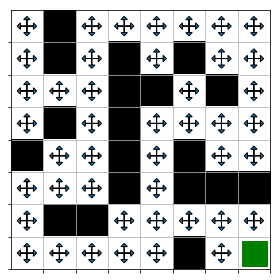

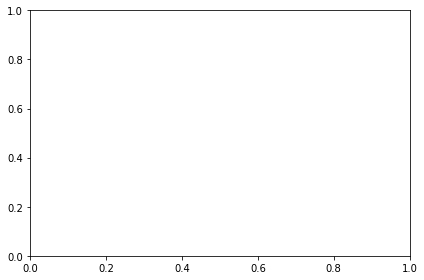

INFO: 17:03:42: episode: 1/200 | status: win  | e: 0.10000
INFO: 17:03:44: episode: 2/200 | status: win  | e: 0.09950
INFO: 17:03:58: episode: 3/200 | status: lose | e: 0.09900
INFO: 17:04:02: episode: 4/200 | status: win  | e: 0.09851
INFO: 17:04:14: episode: 5/200 | status: lose | e: 0.09801
INFO: 17:04:15: won: 10 | lost: 34 | win rate: 0.22727
INFO: 17:04:17: episode: 6/200 | status: win  | e: 0.09752
INFO: 17:04:30: episode: 7/200 | status: win  | e: 0.09704
INFO: 17:04:32: episode: 8/200 | status: win  | e: 0.09655
INFO: 17:04:44: episode: 9/200 | status: lose | e: 0.09607
INFO: 17:04:57: episode: 10/200 | status: lose | e: 0.09559
INFO: 17:04:58: won: 14 | lost: 30 | win rate: 0.31818


In [0]:
if 0:  # only show the maze
    game.render("moves")
    game.reset()

if 0:  # play using random model
    model = RandomModel(game)
    model.train()

if 0:  # train using tabular Q-learning
    model = QTableModel(game, name="QTableModel")
    h, w, _, _ = model.train(discount=0.90, exploration_rate=0.10, learning_rate=0.10, episodes=200)

if 0:  # train using tabular Q-learning and an eligibility trace (aka TD-lamba)
    model = QTableTraceModel(game)
    h, w, _, _ = model.train(discount=0.90, exploration_rate=0.10, learning_rate=0.10, episodes=200)

if 0:  # train using tabular SARSA learning
    model = SarsaTableModel(game)
    h, w, _, _ = model.train(discount=0.90, exploration_rate=0.10, learning_rate=0.10, episodes=200)

if 1:  # train using tabular SARSA learning and an eligibility trace
    game.render("training")  # shows all moves and the q table; nice but slow.
    model = SarsaTableTraceModel(game)
    h, w, _, _ = model.train(discount=0.90, exploration_rate=0.10, learning_rate=0.10, episodes=200)

if 0:  # train using a neural network with experience replay (also saves the resulting model)
    model = QReplayNetworkModel(game)
    h, w, _, _ = model.train(discount=0.80, exploration_rate=0.10, episodes=maze.size * 10, max_memory=maze.size * 4)

In [0]:
try:
    h  # force a NameError exception if h does not exist (and thus don't try to show win rate and cumulative reward)
    fig, (ax1, ax2) = plt.subplots(2, 1, tight_layout=True)
    fig.canvas.set_window_title(model.name)
    ax1.plot(*zip(*w))
    ax1.set_xlabel("episode")
    ax1.set_ylabel("win rate")
    ax2.plot(h)
    ax2.set_xlabel("episode")
    ax2.set_ylabel("cumulative reward")
    plt.show()
except NameError:
    pass

In [0]:
if 0:  # load a previously trained model
    model = QReplayNetworkModel(game, load=True)

if 0:  # compare learning speed (cumulative rewards and win rate) of several models in a diagram
    rhist = list()
    whist = list()
    names = list()

    models = [0, 1, 2, 3, 4]

    for model_id in models:
        logging.disable(logging.WARNING)
        if model_id == 0:
            model = QTableModel(game, name="QTableModel")
        elif model_id == 1:
            model = SarsaTableModel(game, name="SarsaTableModel")
        elif model_id == 2:
            model = QTableTraceModel(game, name="QTableTraceModel")
        elif model_id == 3:
            model = SarsaTableTraceModel(game, name="SarsaTableTraceModel")
        elif model_id == 4:
            model = QReplayNetworkModel(game, name="QReplayNetworkModel")

        r, w, _, _ = model.train(discount=0.90, exploration_rate=0.10, exploration_decay=0.999, learning_rate=0.10,
                                 episodes=300)
        rhist.append(r)
        whist.append(w)
        names.append(model.name)

    f, (rhist_ax, whist_ax) = plt.subplots(2, len(models), sharex="row", sharey="row", tight_layout=True)

    for i in range(len(rhist)):
        rhist_ax[i].set_title(names[i])
        rhist_ax[i].set_ylabel("cumulative reward")
        rhist_ax[i].plot(rhist[i])

    for i in range(len(whist)):
        whist_ax[i].set_xlabel("episode")
        whist_ax[i].set_ylabel("win rate")
        whist_ax[i].plot(*zip(*(whist[i])))

    plt.show()


In [0]:
if 0:  # run a number of training episodes and plot the training time and episodes needed in histograms (time consuming)
    runs = 10

    epi = list()
    nme = list()
    sec = list()

    models = [0, 1, 2, 3, 4]

    for model_id in models:
        episodes = list()
        seconds = list()

        logging.disable(logging.WARNING)
        for r in range(runs):
            if model_id == 0:
                model = QTableModel(game, name="QTableModel")
            elif model_id == 1:
                model = SarsaTableModel(game, name="SarsaTableModel")
            elif model_id == 2:
                model = QTableTraceModel(game, name="QTableTraceModel")
            elif model_id == 3:
                model = SarsaTableTraceModel(game, name="SarsaTableTraceModel")
            elif model_id == 4:
                model = QReplayNetworkModel(game, name="QReplayNetworkModel")

            _, _, e, s = model.train(stop_at_convergence=True, discount=0.90, exploration_rate=0.10,
                                     exploration_decay=0.999, learning_rate=0.10, episodes=1000)

            print(e, s)

            episodes.append(e)
            seconds.append(s.seconds)

        logging.disable(logging.NOTSET)
        logging.info("model: {} | trained {} times | average no of episodes: {}| average training time {}"
                     .format(model.name, runs, np.average(episodes), np.sum(seconds) / len(seconds)))

        epi.append(episodes)
        sec.append(seconds)
        nme.append(model.name)

    f, (epi_ax, sec_ax) = plt.subplots(2, len(models), sharex="row", sharey="row", tight_layout=True)

    for i in range(len(epi)):
        epi_ax[i].set_title(nme[i])
        epi_ax[i].set_xlabel("training episodes")
        epi_ax[i].hist(epi[i], edgecolor="black")

    for i in range(len(sec)):
        sec_ax[i].set_xlabel("seconds per episode")
        sec_ax[i].hist(sec[i], edgecolor="black")

    plt.show()

In [0]:
game.render("moves")
game.play(model, start_cell=(0, 0))
# game.play(model, start_cell=(2, 5))
# game.play(model, start_cell=(4, 1))

plt.show()  # must be placed here else the image disappears immediately at the end of the program

In [0]:
maze = np.array([
    [0, 0, 1, 2, 1, 0, 0, 0],
    [0, 0, 1, 2, 1, 0, 0, 0],
    [1, 1, 1, 2, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2, 2, 2],
    [1, 1, 1, 2, 1, 1, 1, 1],
    [0, 0, 1, 2, 1, 0, 0, 0],
    [0, 0, 1, 2, 1, 0, 0, 0],
    [0, 0, 1, 2, 1, 0, 0, 0]
])  # 0 = free, 1 = occupied

game = Maze(maze)